In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import scienceplots
# %matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

from scipy.interpolate import interp1d

import nanonets_utils
import nanonets

In [2]:
def plot_freq(f, ax, min_y, max_y, N_f=5):

    ax.vlines(f, min_y, max_y, colors='black', linestyles='solid', label=f"$f_0 = {f}$ GHz")

    for n in range(2,N_f+1):
        ax.vlines(n*f, min_y, max_y, colors='#A60628', linestyles='dotted')
    
    return ax

In [3]:
dic = {f : pd.read_csv(f"uniform/data/Nx=7_Ny=7_Nz=1_Ne=2_{f}.csv") for f in np.round(np.arange(0.3,6,0.1),2)}

In [7]:
dic[1.1]

,E0,E1,G,Eq_Jumps,Jumps,Current,Error
0,0.200000,0.0,0.0,1000000.0,12.124,-63.028667,9.911428
1,0.199988,0.0,0.0,1000000.0,10.991,-78.932104,10.976739
2,0.199952,0.0,0.0,1000000.0,10.722,-84.660587,11.567233
3,0.199891,0.0,0.0,1000000.0,10.500,-88.700604,11.725384
4,0.199806,0.0,0.0,1000000.0,10.463,-92.622195,11.552975
...,...,...,...,...,...,...,...
9994,-0.199953,0.0,0.0,1000000.0,7.104,-34.256801,7.084224
9995,-0.199988,0.0,0.0,1000000.0,6.966,-35.183628,6.980934
9996,-0.200000,0.0,0.0,1000000.0,6.883,-41.848909,7.700516
9997,-0.199987,0.0,0.0,1000000.0,6.987,-46.964273,8.239248


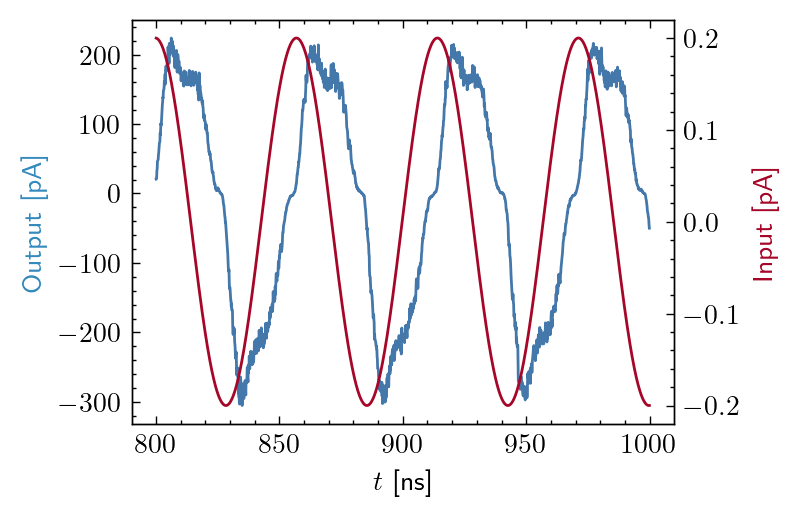

In [19]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax.plot(time[8001:]*1e9, dic[1.1]['Current'][8000:])
    ax2 = ax.twinx()
    ax2.plot(time[8001:]*1e9, dic[1.1]['E0'][8000:], nanonets_utils.red_color)
    ax.set_xlabel("$t$ [ns]")
    ax.set_ylabel('Output [pA]', c=nanonets_utils.blue_color)
    ax2.set_ylabel('Input [pA]', c=nanonets_utils.red_color)

    fig.savefig("plots/I_O_example.svg", transparent=True)

(0.0, 100.0)

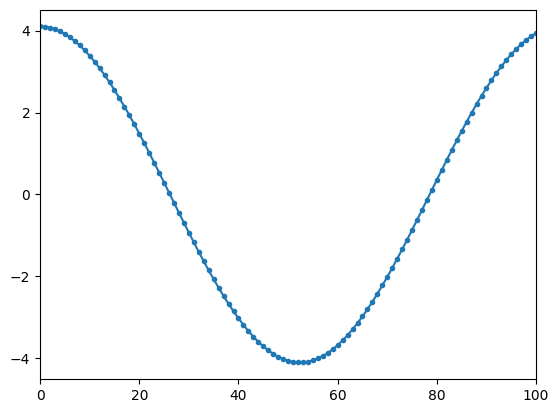

In [4]:
step_size   = 1e-10
N_voltages  = 10000
time        = step_size*np.arange(N_voltages)
amplitude   = 4.1

plt.plot(amplitude*np.cos(6*time*1e8), '.-')
plt.xlim(0,100)

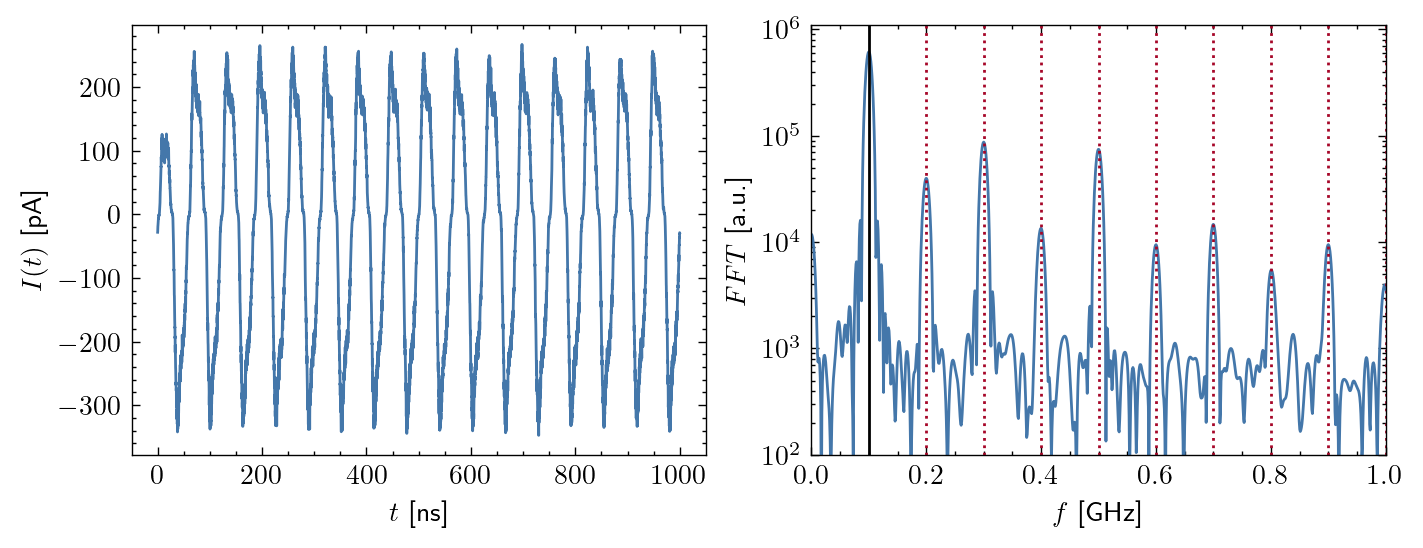

In [6]:
freq    = 1
signal  = dic[freq]['Current'].values
dt      = 1e-10
xf, yf  = nanonets_utils.fft(signal-np.mean(signal), dt, n_padded=65536)
time    = np.arange(len(signal))*dt*1e9
min_y   = 100
min_x   = 0
max_x   = 1
max_y   = 1.1e6

with plt.style.context(["science", "bright"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)

    ax = fig.add_subplot(1,2,1)
    ax.plot(time, signal)
    ax.set_ylabel("$I(t)$ [pA]")
    ax.set_xlabel("$t$ [ns]")
    # ax.set_ylim(-100,100)
    # ax.set_xlim(0,50)

    ax  = fig.add_subplot(1,2,2)
    ax.plot(xf,yf)
    ax  = plot_freq(freq/10, ax=ax, min_y=min_y, max_y=max_y, N_f=10)
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)
    ax.set_yscale('log')
    ax.set_xlabel("$f$ [GHz]")
    ax.set_ylabel("$FFT$ [a.u.]")

    fig.savefig("plots/fft_output_example.png", transparent=True, bbox_inches='tight')
    fig.savefig("plots/fft_output_example.svg", transparent=True, bbox_inches='tight')

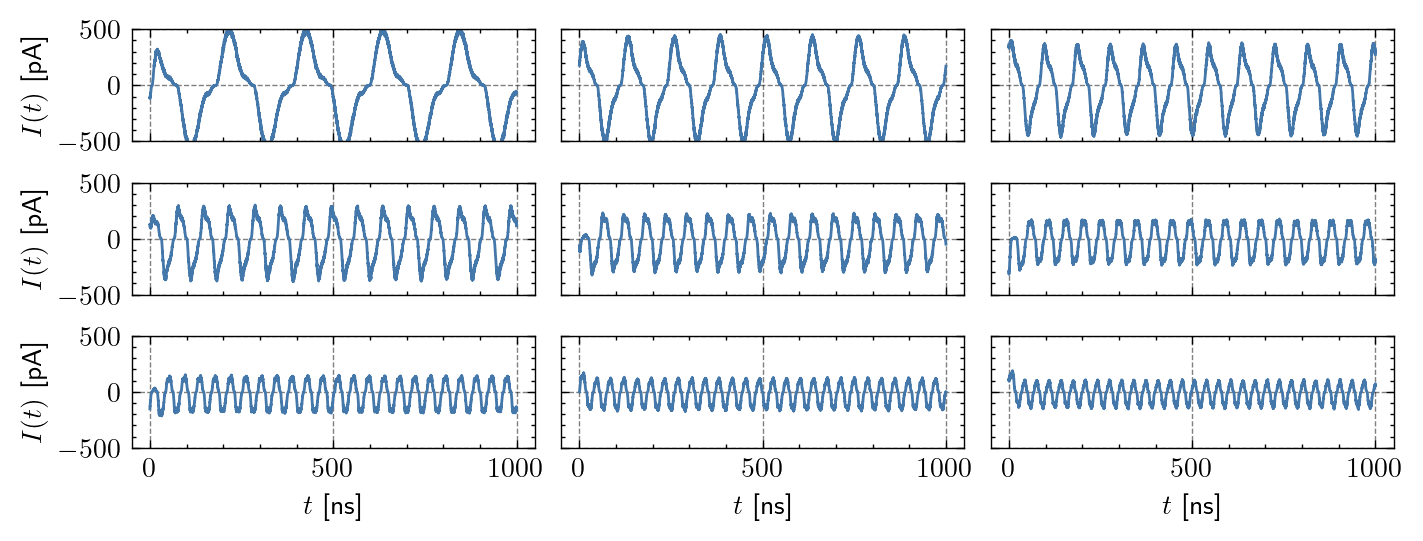

In [7]:
cmap    = plt.get_cmap('Reds')
f_vals  = np.round(np.arange(0.3,2,0.2),2)
miny    = 1e1
maxy    = 1e5
dt      = 1e-10
n_rows  = 3
n_cols  = 3

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    fig.set_figheight(fig.get_figheight()*1.2)
    
    for i, f in enumerate(f_vals):

        ax      = fig.add_subplot(4,3,i+1)
        signal  = dic[f]['Current'].values
        
        ax.plot(time,signal)

        if i % n_cols == 0:
            ax.set_ylabel('$I(t)$ [pA]')
        else:
            ax.set_yticklabels("")

        if i >= (n_rows-1)*3:
            ax.set_xlabel('$t$ [ns]')
        else:
            ax.set_xticklabels("")

        ax.set_ylim(-500,500)
        
    fig.savefig("plots/output_comparsion.png", transparent=True, bbox_inches='tight')
    fig.savefig("plots/output_comparsion.svg", transparent=True, bbox_inches='tight')

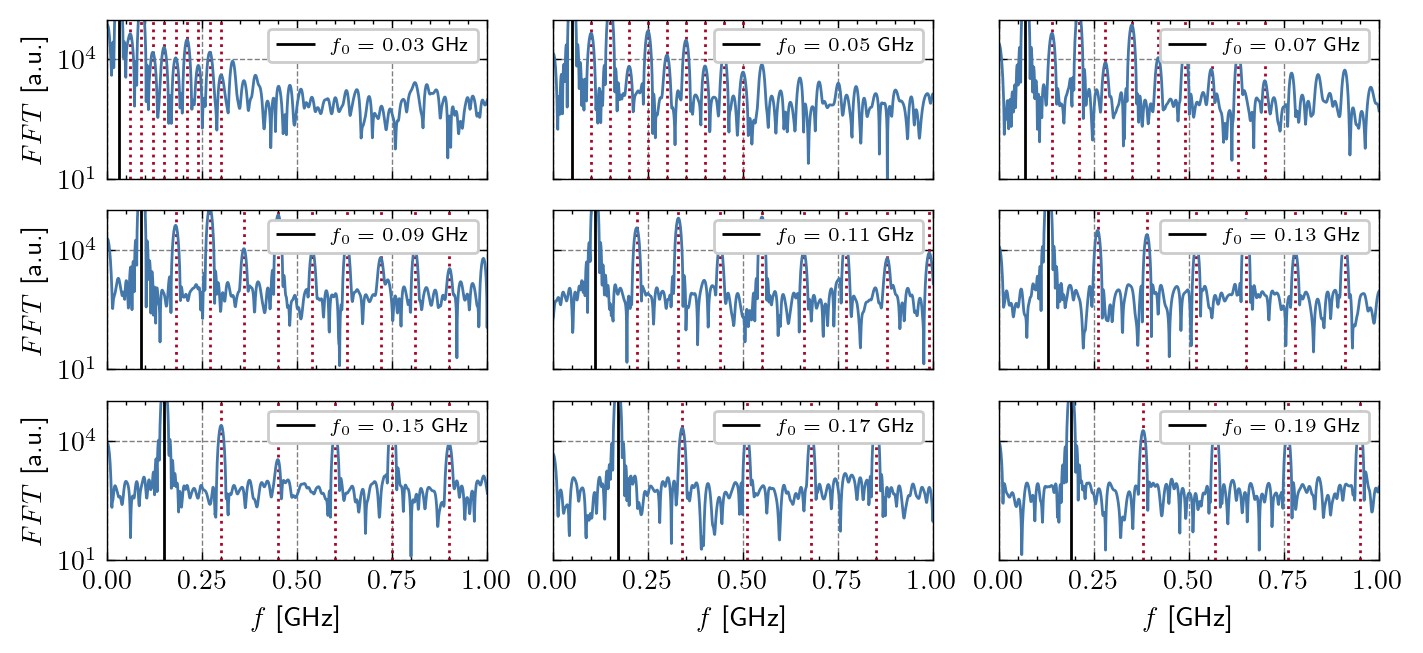

In [8]:
cmap    = plt.get_cmap('Reds')
miny    = 1e1
maxy    = 1e5
dt      = 1e-10
n_rows  = 3
n_cols  = 3

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    fig.set_figheight(fig.get_figheight()*1.2)
    
    for i, f in enumerate(f_vals):

        ax      = fig.add_subplot(n_rows,n_cols,i+1)
        signal  = dic[f]['Current'].values
        
        xf, yf  = nanonets_utils.fft(signal-np.mean(signal), dt, n_padded=65536)
        ax      = plot_freq(np.round(f/10,2), ax, miny, maxy, N_f=10)

        ax.plot(xf, yf)
        ax.set_xlim(0,1)
        ax.set_ylim(miny, maxy)
        ax.set_yscale('log')
        ax.legend(fontsize='x-small', loc='upper right')

        if i % n_cols == 0:
            ax.set_ylabel('$FFT$ [a.u.]')
        else:
            ax.set_yticklabels("")

        if i >= (n_rows-1)*3:
            ax.set_xlabel('$f$ [GHz]')
        else:
            ax.set_xticklabels("")

    fig.savefig("plots/fft_comparsion.png", transparent=True, bbox_inches='tight')
    fig.savefig("plots/fft_comparsion.svg", transparent=True, bbox_inches='tight')

In [9]:
def relate_to_fundamental_freq(signal, f, dt, N_f=10):

    xf, yf  = nanonets_utils.fft(signal, dt, n_padded=65536)
    func    = interp1d(xf, yf)

    vals    = []
    for n in range(1,N_f+1):
        vals.append(func(n*f/10))
    
    return np.array(vals)

In [10]:
N_f                 = 10
df_fft_amplitudes   = pd.DataFrame()

for f in dic.keys():
    
    signal  = dic[f]['Current'].values
    vals    = relate_to_fundamental_freq(signal, f, dt, N_f=N_f)

    df_fft_amplitudes[f] = vals

df_nonlinear    = df_fft_amplitudes / df_fft_amplitudes.iloc[0,:]
df_nonlinear    = df_nonlinear.drop(0).reset_index(drop=True)
df_nonlinear

,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,...,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9
0,0.043136,0.049433,0.050515,0.055833,0.057638,0.059266,0.062442,0.064845,0.064397,0.065572,...,0.384089,0.374432,0.379831,0.384293,0.364787,0.360813,0.355037,0.359075,0.340782,0.345704
1,0.307328,0.296486,0.278704,0.256839,0.230885,0.201360,0.171425,0.142161,0.113304,0.081482,...,0.126864,0.118117,0.121329,0.108471,0.105209,0.103309,0.098340,0.087633,0.079000,0.084272
2,0.014966,0.010994,0.007390,0.007774,0.010476,0.014032,0.016104,0.021970,0.024679,0.027780,...,0.016249,0.009251,0.011944,0.011017,0.015879,0.001878,0.002099,0.006510,0.019098,0.024076
3,0.019798,0.035630,0.056994,0.076771,0.093103,0.106508,0.113955,0.121457,0.121382,0.123848,...,0.020022,0.023509,0.018643,0.019702,0.010106,0.015067,0.020738,0.002730,0.016572,0.018412
4,0.010826,0.012908,0.014195,0.014655,0.014053,0.015033,0.014250,0.015421,0.015847,0.014743,...,0.008126,0.012079,0.010148,0.008952,0.006691,0.015990,0.005247,0.003269,0.004508,0.008073
5,0.031105,0.034351,0.033443,0.029463,0.025231,0.023191,0.022630,0.023946,0.030423,0.033552,...,0.003335,0.004977,0.010319,0.004081,0.008760,0.009383,0.002077,0.007184,0.009815,0.008311
6,0.006987,0.007424,0.007521,0.007849,0.007069,0.007830,0.009679,0.008804,0.011065,0.011173,...,0.005925,0.006021,0.009386,0.008214,0.005551,0.012664,0.001241,0.010187,0.005373,0.008043
7,0.015075,0.014540,0.015693,0.017511,0.019049,0.017537,0.015973,0.015427,0.015045,0.012696,...,0.006218,0.005021,0.004943,0.006263,0.009319,0.010584,0.007553,0.008347,0.009832,0.009545
8,0.004036,0.004476,0.005285,0.004441,0.003674,0.002479,0.004987,0.006203,0.008393,0.007414,...,0.007949,0.002134,0.002462,0.004994,0.003036,0.003965,0.004430,0.001827,0.006659,0.002883


In [11]:
df_nonlinear_new    = df_nonlinear.copy()
df_nonlinear_new    = df_nonlinear_new.set_index(np.arange(2,N_f+1))

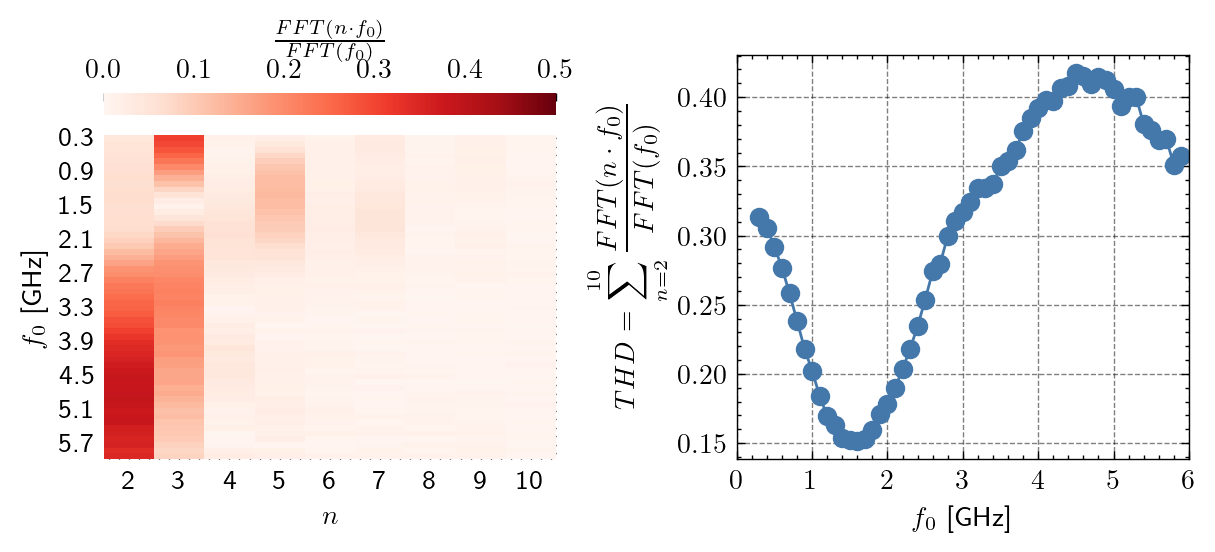

In [12]:
cmap = plt.get_cmap('Reds')

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot(1,2,1)
    fig.set_figwidth(fig.get_figwidth()*2)

    ax  = sns.heatmap(df_nonlinear_new.T, cmap='Reds', ax=ax, cbar_kws={'label':"$\\frac{FFT(n \cdot f_0)}{FFT(f_0)}$", "location":"top"}, vmin=0, vmax=0.5)
    ax.set_ylabel("$f_0$ [GHz]")
    ax.set_xlabel("$n$")

    # for i, col in enumerate(df_nonlinear.columns):
    #     ax.plot(np.arange(2,len(df_fft_amplitudes)+1), df_nonlinear[col], c=cmap((i+1)/(len(df_nonlinear.columns))))

    # ax.set_ylabel("$\\frac{FFT(n \cdot f_0)}{FFT(f_0)}$")
    # ax.set_xlabel("$n$")

    ax  = fig.add_subplot(1,2,2)
    ax  = np.sqrt((df_nonlinear**2).sum()).plot(ax=ax, marker='o')
    ax.set_ylabel("$THD$ = $\displaystyle\sum_{n=2}^{10}\\frac{FFT(n \cdot f_0)}{FFT(f_0)}$")
    ax.set_xlabel("$f_0$ [GHz]")
    ax.set_xlim(0,6)

    plt.subplots_adjust(wspace=0.4)
    plt.locator_params(axis='x', nbins=8)

    fig.savefig("plots/harmonic_generation.png", transparent=True, bbox_inches='tight')
    fig.savefig("plots/harmonic_generation.svg", transparent=True, bbox_inches='tight')

In [13]:
np.arange(0.3,4.1,0.4)

array([0.3, 0.7, 1.1, 1.5, 1.9, 2.3, 2.7, 3.1, 3.5, 3.9])

In [14]:
dic[4.5]

,E0,E1,G,Eq_Jumps,Jumps,Current,Error
0,0.200000,0.0,0.0,1000000.0,10.882,2.062225,1.960556
1,0.199798,0.0,0.0,1000000.0,9.643,1.706482,2.813642
2,0.199191,0.0,0.0,1000000.0,9.300,1.827249,2.704428
3,0.198180,0.0,0.0,1000000.0,9.067,0.939436,1.722180
4,0.196769,0.0,0.0,1000000.0,8.668,1.322082,1.925642
...,...,...,...,...,...,...,...
9994,-0.177191,0.0,0.0,1000000.0,7.103,2.084852,1.946226
9995,-0.172839,0.0,0.0,1000000.0,6.921,2.678330,1.933867
9996,-0.168137,0.0,0.0,1000000.0,6.630,2.700686,1.869723
9997,-0.163095,0.0,0.0,1000000.0,6.414,1.984980,1.810176


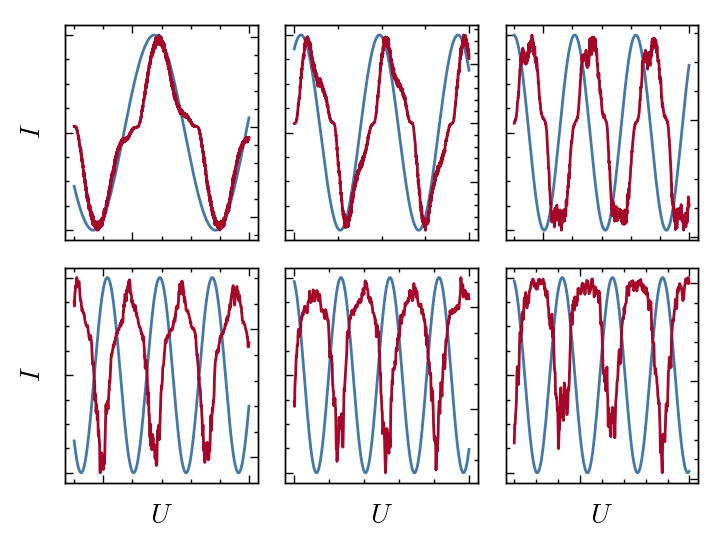

In [15]:
amplitude       = 0.2
freq            = 1.5
step_size       = 1e-10
time            = step_size*np.arange(N_voltages)[1:]
n_cols          = 3
n_rows          = 2
f_vals          = [0.3, 0.7, 1.5, 3.5, 4.5, 5.5]
xmin            = [7000,8000,8800,9400,9500,9600]

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200, layout='constrained')

    for i, f in enumerate(f_vals):

        ax              = fig.add_subplot(n_rows,n_cols,i+1)
        ax2             = ax.twinx()
        input_signal    = amplitude*np.cos(f*time*1e8)
        signal          = dic[f]['Current'].values

        ax.plot(time[xmin[i]:], input_signal[xmin[i]:])
        ax2.plot(time[xmin[i]:], signal[xmin[i]:], c=nanonets_utils.red_color)

        # ax  = fig.add_subplot(4,2,(2+1)*i+1)
        ax.set_xticklabels("")
        ax.set_yticklabels("")
        ax2.set_yticklabels("")

        if i % n_cols == 0:
            ax.set_ylabel('$I$')

        if i >= (n_rows-1)*n_cols:
            ax.set_xlabel('$U$')

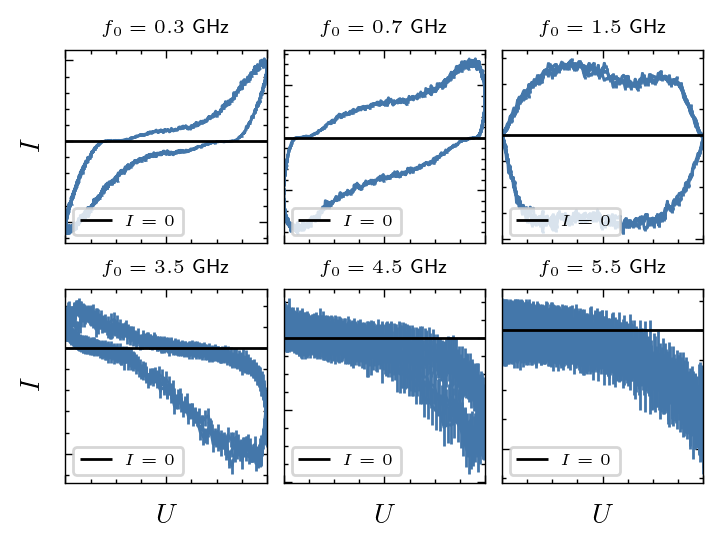

In [16]:
amplitude       = 0.2
freq            = 1.5
step_size       = 1e-10
time            = step_size*np.arange(N_voltages)[1:]
n_cols          = 3
n_rows          = 2
f_vals          = [0.3, 0.7, 1.5, 3.5, 4.5, 5.5]
xmin            = [7000,8000,8800,9400,9500,9600]

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200, layout='constrained')

    for i, f in enumerate(f_vals):

        ax              = fig.add_subplot(n_rows,n_cols,i+1)
        input_signal    = amplitude*np.cos(f*time*1e8)
        signal          = dic[f]['Current'].values
        error           = dic[f]['Error'].values

        ax.errorbar(input_signal[xmin[i]:], signal[xmin[i]:], error[xmin[i]])
        ax.hlines(0,-0.2,0.2, 'black', zorder=10, label="$I = 0$")
        ax.set_xlim(-0.2,0.2)
        ax.set_xticklabels("")
        ax.set_yticklabels("")
        ax.legend(fontsize='xx-small', loc='lower left', frameon=True)

        ax.set_title(f'$f_0 = {f}$ GHz', fontsize='x-small')

        if i % n_cols == 0:
            ax.set_ylabel('$I$')

        if i >= (n_rows-1)*n_cols:
            ax.set_xlabel('$U$')
    
    fig.savefig("plots/I_V_harmoic_generation.png", transparent=True, bbox_inches='tight')
    fig.savefig("plots/I_V_harmoic_generation.svg", transparent=True, bbox_inches='tight')

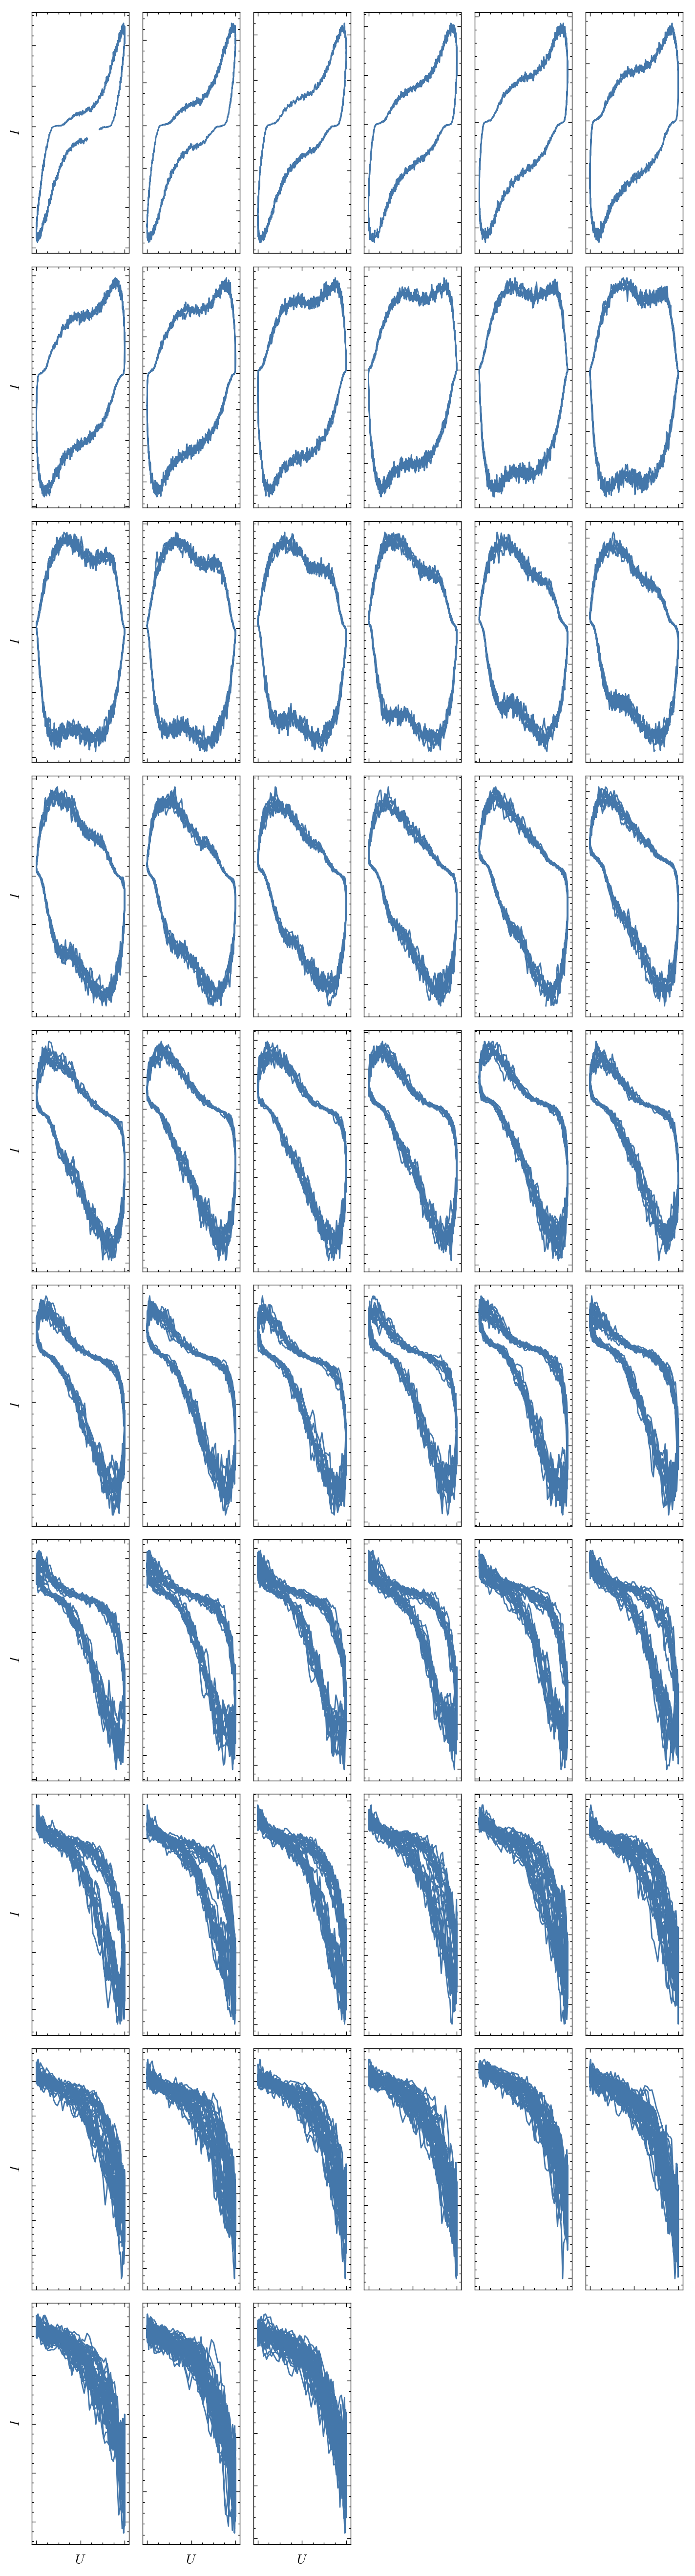

In [17]:
amplitude       = 0.2
freq            = 1.5
step_size       = 1e-10
time            = step_size*np.arange(N_voltages)[1:]
n_cols          = 6
n_rows          = 10
f_vals          = [0.3, 1.5, 2.8, 4.5]
xmin            = 8000

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figheight(fig.get_figheight()*10)
    fig.set_figwidth(fig.get_figwidth()*2)

    for i, f in enumerate(dic.keys()):

        ax              = fig.add_subplot(n_rows,n_cols,i+1)
        input_signal    = amplitude*np.cos(f*time*1e8)
        signal          = dic[f]['Current'].values

        ax.plot(input_signal[xmin:], signal[xmin:])
        ax.set_xticklabels("")
        ax.set_yticklabels("")

        if i % n_cols == 0:
            ax.set_ylabel('$I$')

        if i >= (n_rows-1)*n_cols:
            ax.set_xlabel('$U$')

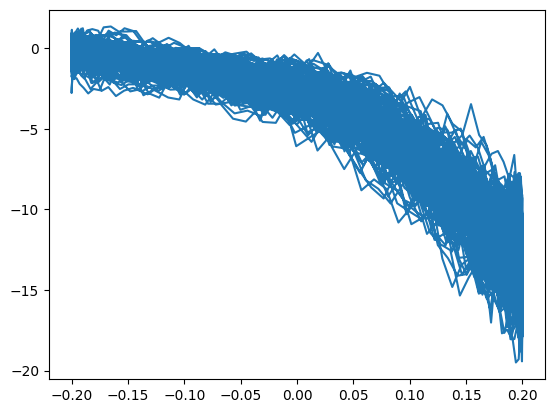

In [18]:
plt.plot(input_signal[800:], signal[800:])

---

### Charge Redistribtuion

In [19]:
dic_s = {f : pd.read_csv(f"uniform/data/mean_state_Nx=7_Ny=7_Nz=1_Ne=2_{f}.csv") for f in np.round(np.arange(0.3,6,0.1),2)}

for key, df in dic_s.items():

    dic_s[key].columns = np.arange(0,49)

In [20]:
def multiplot_observable_based_on_network(x_vals : pd.DataFrame, y_vals : pd.DataFrame, N : int,
                                          fig_scale=(1.5,1.5), x_lim=None, y_lim=None, y_label='y',
                                          x_label='x', log_x=False, log_y=False, style_context=["science","bright","grid"],
                                          x_full_range=False, y_full_range=False):
    
    if type(x_vals) == type(np.array([])):

        x_vals_new = pd.DataFrame()

        for col in y_vals.columns:

            x_vals_new[col] = x_vals
    
        x_vals = x_vals_new

    with plt.style.context(style_context):
        
        fig, axs    = plt.subplots(ncols=N, nrows=N, layout='constrained')
        width       = fig.get_figwidth()
        fig.set_figwidth(width*fig_scale[0])
        fig.set_figheight(width*fig_scale[1])

        if x_lim == None:
            x_lim = [x_vals.min().min(), x_vals.max().max()]

        if y_lim == None:
            y_lim = [y_vals.min().min(), y_vals.max().max()]

        i = 0

        for row in np.arange((N-1),-1,-1):
            
            for col in range(0,N):

                axs[row,col].plot(x_vals.loc[:,i], y_vals.loc[:,i])
                
                axs[row,col].set_xlim(x_lim[0],x_lim[1])
                axs[row,col].set_ylim(y_lim[0],y_lim[1])

                if i % N != 0:
                    axs[row,col].set_yticklabels("")
                else:    
                    axs[row,col].set_ylabel(y_label)

                if (i > N-1):
                    axs[row,col].set_xticklabels("")
                else:
                    axs[row,col].set_xlabel(x_label)

                if log_x:
                    axs[row,col].set_xscale('log')

                if log_y:
                    axs[row,col].set_yscale('log')

                if y_full_range:
                    axs[row,col].set_ylim(y_vals.loc[:,i].min(),y_vals.loc[:,i].max())
                    axs[row,col].set_yticklabels("")

                if x_full_range:
                    axs[row,col].set_xlim(x_vals.loc[:,i].min(),x_vals.loc[:,i].max())
                    axs[row,col].set_xticklabels("")

                i += 1

    return fig, axs

In [21]:
df_low          = dic_s[1.6].copy()
df_low.columns  = np.arange(0,49)
input_low       = amplitude*np.cos(1.6*time*1e8)
df_high         = dic_s[4.5].copy()
df_high.columns = np.arange(0,49)
input_high      = amplitude*np.cos(4.5*time*1e8)

(0.0, 1.5)

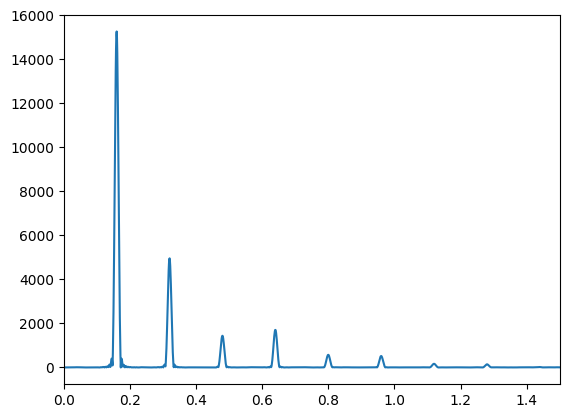

In [22]:
signal  = df_low[0].values
xf, yf  = nanonets_utils.fft(signal-np.mean(signal), dt, n_padded=65536)

plt.plot(xf, yf)
plt.xlim(0,1.5)

(900.0, 1000.0)

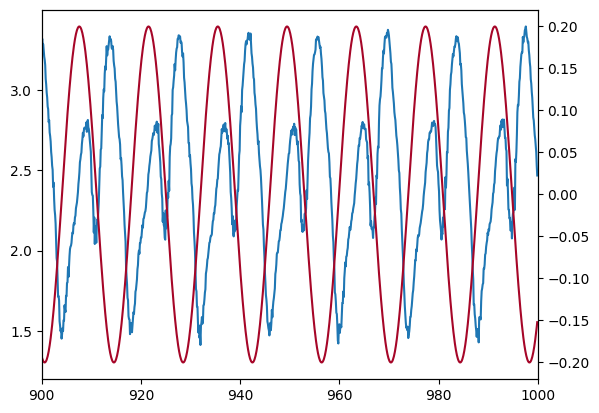

In [23]:
fig = plt.figure()
ax  = fig.add_subplot()
ax2 = ax.twinx()
ax.plot(time*1e9, df_high[6])
ax2.plot(time*1e9, input_high, nanonets_utils.red_color)
ax.set_xlim(900,1000)

In [24]:
def autocorrelation(x : np.array, y : np.array, lags : int):

    return [np.corrcoef(x, y)[0,1] if l==0 else np.corrcoef(x[:-l], y[l:])[0,1] for l in range(lags)]

In [25]:
amplitude       = 0.2
input_signal    = amplitude*np.cos(freq*time*1e8)

Text(0.5, 0.98, '$f_0 = 1.6$ GHz')

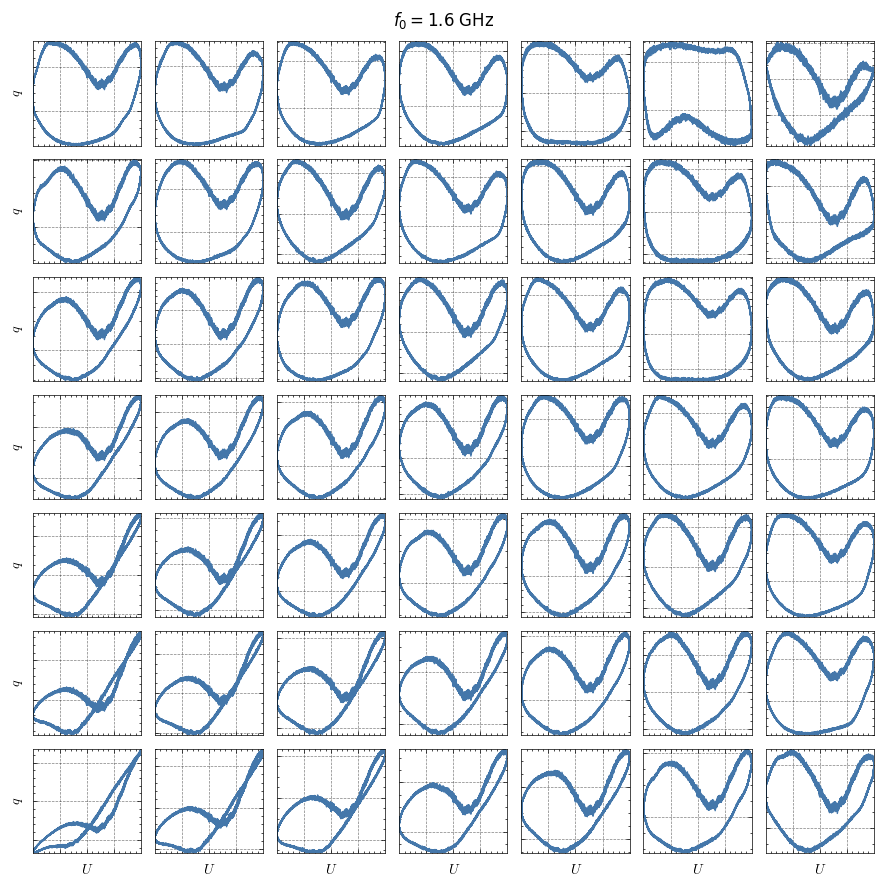

In [26]:
fig, ax = multiplot_observable_based_on_network(input_low[900:], df_low[900:], 7, fig_scale=(2.5,2.5),
                                                x_full_range=True, y_full_range=True, y_label="$q$", x_label="$U$") 
fig.suptitle("$f_0 = 1.6$ GHz")

Text(0.5, 0.98, '$f_0 = 4.8$ GHz')

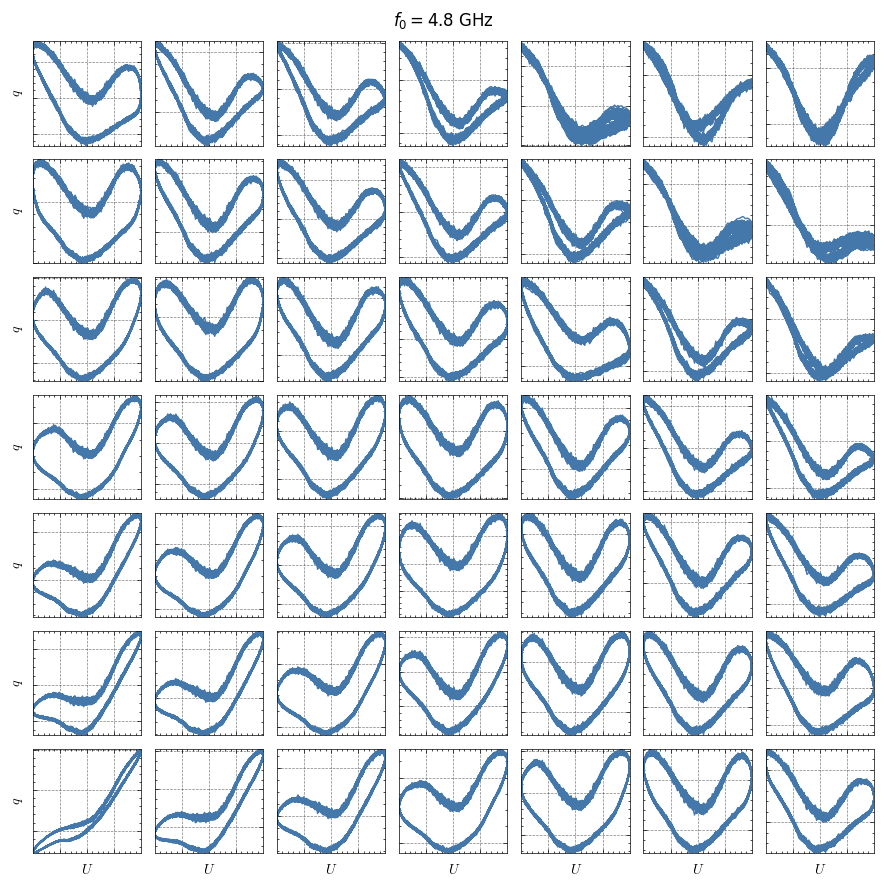

In [27]:
fig, ax = multiplot_observable_based_on_network(input_high[900:], df_high[900:], 7, fig_scale=(2.5,2.5),
                                                x_full_range=True, y_full_range=True, y_label="$q$", x_label="$U$") 
fig.suptitle("$f_0 = 4.8$ GHz")

Text(0.5, 0.98, '$f_0 = 4.8$ GHz')

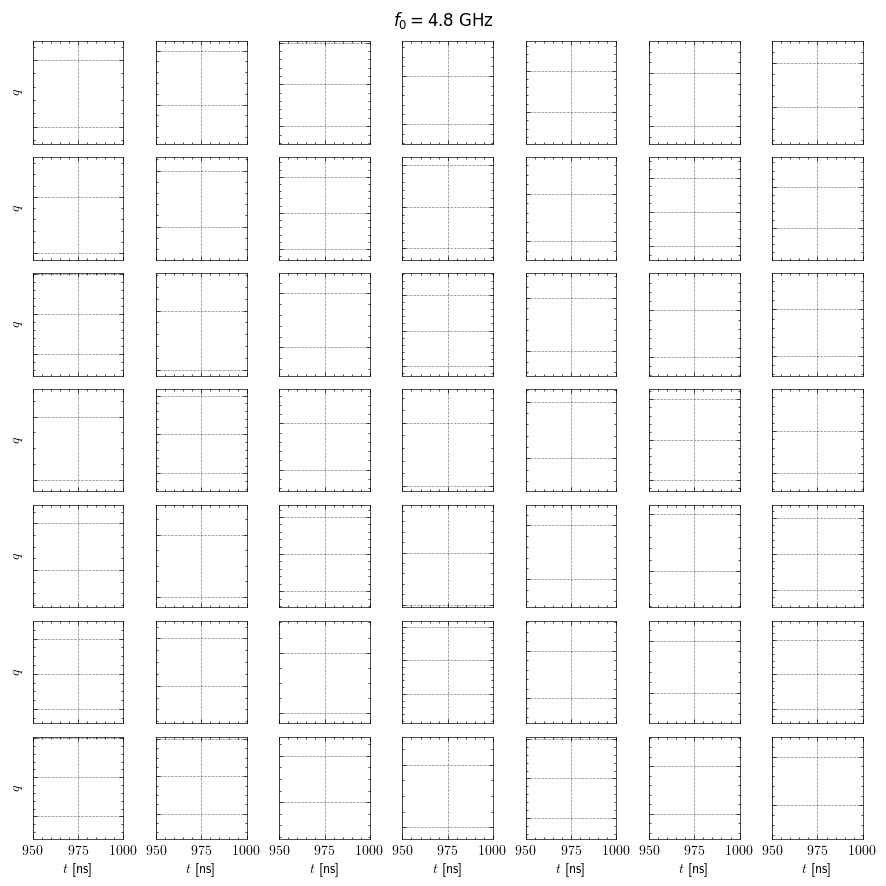

In [28]:
fig, ax = multiplot_observable_based_on_network(time, df_high, 7, fig_scale=(2.5,2.5), x_lim=(950,1000), y_lim=(-1,10),
                                                y_full_range=True, y_label="$q$", x_label="$t$ [ns]")
fig.suptitle("$f_0 = 4.8$ GHz")

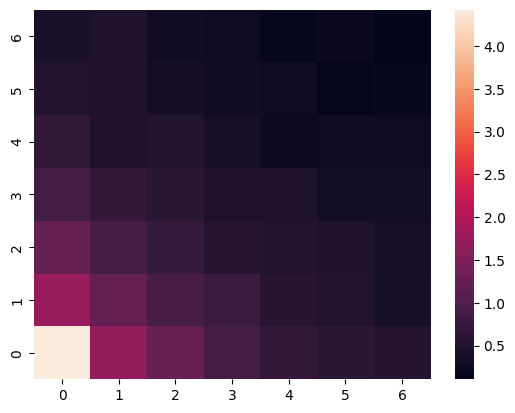

In [29]:
ax = sns.heatmap(np.reshape(df_high.std().values,(-1,7)))
ax.invert_yaxis()

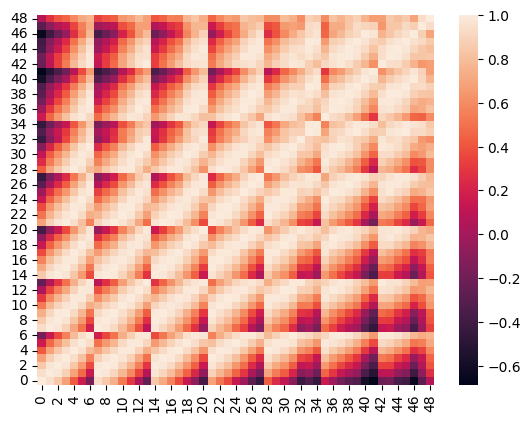

In [30]:
ax = sns.heatmap(df_high.corr())
ax.invert_yaxis()

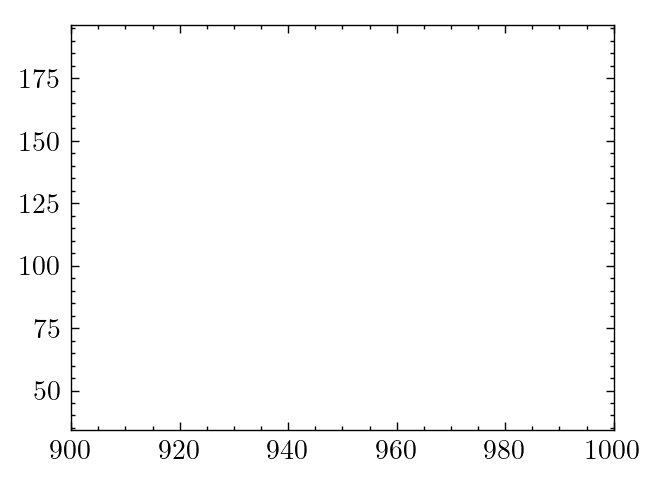

In [31]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    ax.plot(time, df_low.sum(axis=1))
    ax.plot(time, df_high.sum(axis=1))

    ax.set_xlim(900,1000)

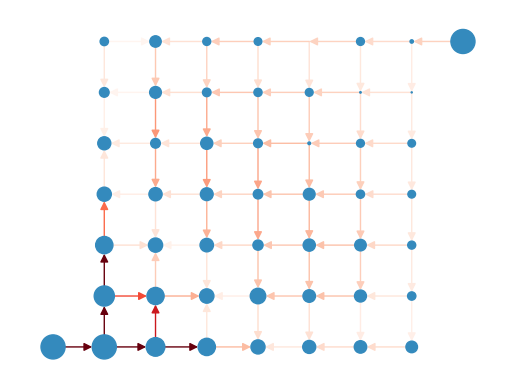

In [2]:
topology_parameter = {
    "Nx"    :   7,
    "Ny"    :   7,
    "Nz"    :   1,
    "e_pos" :   [[0,0,0],[6,6,0]]
}

sim_class   = nanonets.simulation('cubic', topology_parameter)
fig, ax     = nanonets_utils.display_network_currents(path="uniform/data/net_currents_Nx=7_Ny=7_Nz=1_Ne=2_4.5.csv", row=[900,1000],
                                                      N_electrodes=2, pos=sim_class.pos, charge_landscape=True, arrow_scale=1, edge_vmin=0, edge_vmax=0.1)

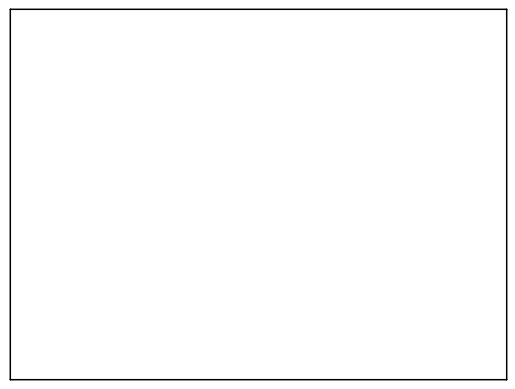

In [40]:
ims = []

for i in range(10):

    if i == 0:
        fig = None

    sim_class   = nanonets.simulation('cubic', topology_parameter)
    fig, ax     = nanonets_utils.display_network_currents(path="uniform/data/net_currents_Nx=7_Ny=7_Nz=1_Ne=2_4.5.csv", row=i,
                                                        N_electrodes=2, pos=sim_class.pos, charge_landscape=True, arrow_scale=1,
                                                        edge_vmin=0, edge_vmax=0.1, fig=fig)
    im  = ax.get_children().copy()
    ims.append(im)
    # fig.clear()
    # ax.clear()

In [41]:
# sim_class   = nanonets.simulation('cubic', topology_parameter)
# fig, ax     = nanonets_utils.display_network_currents(path="uniform/data/net_currents_Nx=7_Ny=7_Nz=1_Ne=2_4.5.csv", row=0,
#                                                         N_electrodes=2, pos=sim_class.pos, charge_landscape=True, arrow_scale=1,
#                                                         edge_vmin=0, edge_vmax=0.1, fig=fig)
ani         = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
ani.save("hi.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


---

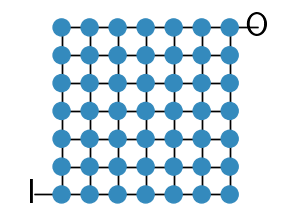

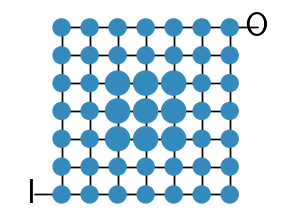

In [37]:
node_size = 150

sim_class   = nanonets.simulation('cubic', topology_parameter)
fig, ax     = nanonets_utils.display_network(np_network_sim=sim_class, node_size=node_size, provide_electrode_labels=["I","O"], font_size=25)
# fig.savefig('plots/network_plot.svg', bbox_inches='tight', transparent=True)
# fig.savefig('plots/network_plot.pdf', bbox_inches='tight', transparent=False)

node_size = np.repeat(150, 51)

for i in [16,17,18,23,24,25,30,31,32]:
    node_size[i] = 300

sim_class   = nanonets.simulation('cubic', topology_parameter)
fig, ax     = nanonets_utils.display_network(np_network_sim=sim_class, node_size=node_size, provide_electrode_labels=["I","O"], font_size=25)
# fig.savefig('plots/network_plot_radius.svg', bbox_inches='tight', transparent=True)
# fig.savefig('plots/network_plot_radius.pdf', bbox_inches='tight', transparent=False)